# **Analyzing Kaggle Survey 2017**

## **Installing kaggle library**

In [1]:
# Mount Google Drive before running the code
!pip install kaggle -U

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/.kaggle/"

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


## **Downloading survey dataset**

Download the survey dataset by running below.

In [2]:
!kaggle datasets download kaggle/kaggle-survey-2017 -p /content/kaggle-survey-2017/

  0% 0.00/3.52M [00:00<?, ?B/s]
100% 3.52M/3.52M [00:00<00:00, 118MB/s]


## **List of Files**

*   **schema.csv**
*   **multipleChoiceResponses.csv**
*   **freeformResponses.csv**
*   **conversionRates.csv**
*   **RespondentTypeREADME.txt**

## **Analyzing Data**

Import required python libraries

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
DIR_PATH = '/content/drive/My Drive/Colab Notebooks/data/kaggle-survey-2017/'

# Get question schema
question = pd.read_csv(os.path.join(DIR_PATH, 'schema.csv'))
print(question.shape)
question.head()

(290, 3)


,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
# Get multiple choice responses
mcq = pd.read_csv(os.path.join(DIR_PATH, 'multipleChoiceResponses.csv'),
                  encoding='ISO-8859-1', low_memory=False)
print(mcq.shape)
print(mcq.columns)

(16716, 228)
Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)


### **Statistics & Graphs**

Master's degree                                                      6273
Bachelor's degree                                                    4811
Doctoral degree                                                      2347
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64


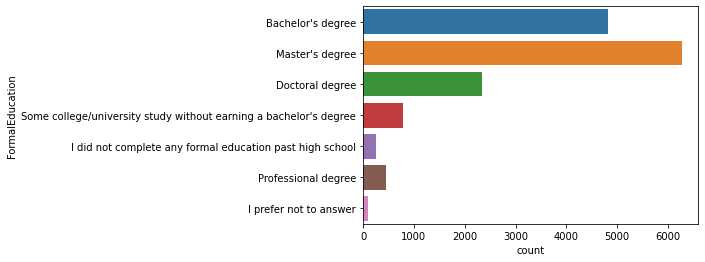

In [6]:
# Formal Education
# Add "normalize=True" parameter in value_counts method to get proportion
print(mcq['FormalEducation'].value_counts())
sns.countplot(y='FormalEducation', data=mcq)

In [7]:
# Responses: by country
con_df = pd.DataFrame(mcq['Country'].value_counts())
# Create index to a new column
con_df.reset_index(level=0, inplace=True)
# Set column names
con_df.columns = ['Country', 'Count']
con_df.head(10)

,Country,Count
0,United States,4197
1,India,2704
2,Other,1023
3,Russia,578
4,United Kingdom,535
5,People 's Republic of China,471
6,Brazil,465
7,Germany,460
8,France,442
9,Canada,440


count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64
Time spent: 34.82142857142857


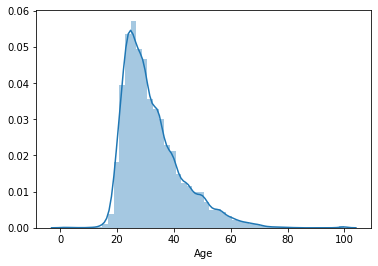

In [8]:
# Age information
print(mcq['Age'].describe())

# Draw graph
# Cases where age is greater than 0
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

# Get mean time spent gathering data of an 20 year old
print('Time spent: {0}'.format(mcq[mcq['Age'] == 20]['TimeGatheringData'].mean()))

In [9]:
# Major
major_df = pd.DataFrame(mcq['MajorSelect'].value_counts())
major_df['prop'] = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
major_df.reset_index(level=0, inplace=True)
major_df.columns = ['Major', 'Count', 'Proportion']
major_df.head(10)

,Major,Count,Proportion
0,Computer Science,4397,0.331074
1,Mathematics or statistics,2220,0.167156
2,Engineering (non-computer focused),1339,0.100821
3,Electrical Engineering,1303,0.098110
4,Other,848,0.063851
5,Physics,830,0.062495
6,"Information technology, networking, or system ...",693,0.052180
7,A social science,531,0.039982
8,Biology,274,0.020631
9,Management information systems,237,0.017845


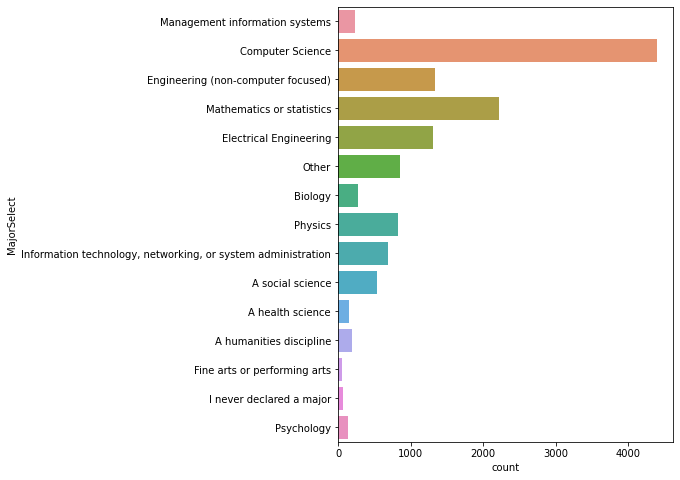

In [10]:
# Graph: Major
plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)